<a href="https://colab.research.google.com/github/Janainareisnascimento/Janainareisnascimento/blob/main/2024_Metafluxo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the Excel file and specify the sheet
file_path = '/content/Fluxo_shoppings_final.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Fluxo de pessoas_premissa')

# Reshape the data: Convert wide date columns into a long format with 'Year', 'Month', and 'People_Flow'
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime to extract 'Year' and 'Month' separately
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows where date conversion failed
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Drop the original 'Date' column as we now have 'Year' and 'Month'
df_melted = df_melted.drop(columns=['Date'])

# Dictionary to store DataFrames for each mall
mall_dfs = {}

# Iterate over each mall and store the data in individual DataFrames
for mall in df_melted['Shopping'].unique():
    mall_dfs[mall] = df_melted[df_melted['Shopping'] == mall].reset_index(drop=True)

# Display the DataFrame for each mall to verify the structure
for mall, data in mall_dfs.items():
    print(f"Data for Mall '{mall}':")
    print(data.head(), "\n")


Data for Mall 'PNSN':
  Shopping  People_Flow  Year  Month
0     PNSN     480875.0  2022      1
1     PNSN     606395.0  2023      1
2     PNSN      68490.0  2024      1
3     PNSN     471364.0  2022      2
4     PNSN     537447.0  2023      2 

Data for Mall 'PSCG':
  Shopping  People_Flow  Year  Month
0     PSCG          0.0  2022      1
1     PSCG     435350.0  2023      1
2     PSCG     397328.0  2024      1
3     PSCG     336649.0  2022      2
4     PSCG     381440.0  2023      2 

Data for Mall 'PSMO':
  Shopping  People_Flow  Year  Month
0     PSMO     188200.0  2022      1
1     PSMO     216108.0  2023      1
2     PSMO     219088.0  2024      1
3     PSMO     157751.0  2022      2
4     PSMO     185736.0  2023      2 

Data for Mall 'PSAR':
  Shopping  People_Flow  Year  Month
0     PSAR          0.0  2022      1
1     PSAR          0.0  2023      1
2     PSAR     265605.0  2024      1
3     PSAR          0.0  2022      2
4     PSAR       4685.0  2023      2 

Data for Mall 'P

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the Excel file and specify the sheet
file_path = '/content/Fluxo_shoppings_final.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Fluxo de pessoas_premissa')

# Reshape the data: Convert wide date columns into a long format with 'Year', 'Month', and 'People_Flow'
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime to extract 'Year' and 'Month' separately
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows where date conversion failed
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Create a month-year label for columns
df_melted['Month_Year'] = df_melted['Date'].dt.strftime('%b/%y')  # Format as "Jan/22", "Feb/22", etc.

# Pivot the data so each mall has a single row with 36 columns for each month-year combination
df_pivoted = df_melted.pivot(index='Shopping', columns='Month_Year', values='People_Flow')

# Sort columns by date to ensure correct ordering from Jan/22 to Dec/24
df_pivoted = df_pivoted.reindex(sorted(df_pivoted.columns, key=lambda x: pd.to_datetime(x, format='%b/%y')), axis=1)

# Reset the index to make 'Shopping' a regular column
df_pivoted.reset_index(inplace=True)

# Display the pivoted DataFrame to verify the structure
print(df_pivoted.head())


Month_Year Shopping    Jan/22    Feb/22    Mar/22    Apr/22    May/22  \
0              PNSN  480875.0  471364.0  558194.0  579012.0  679093.0   
1              PSAR       0.0       0.0       0.0       0.0       0.0   
2              PSBE  255185.0  325482.0  344706.0  377480.0  382178.0   
3              PSCA  304810.0  292453.0  311009.0  338620.0  346390.0   
4              PSCG       0.0  336649.0  379855.0  406163.0  419916.0   

Month_Year    Jun/22    Jul/22    Aug/22    Sep/22  ...    Mar/24    Apr/24  \
0           636185.0  638657.0  629871.0  654471.0  ...  272516.0  229463.0   
1                0.0       0.0       0.0       0.0  ...  307414.0  273475.0   
2           342578.0  362949.0  311811.0  316230.0  ...  382043.0  316710.0   
3           328029.0  376390.0  317011.0  315625.0  ...  347834.0  318872.0   
4           452857.0  484017.0  406152.0  410991.0  ...  426203.0  445161.0   

Month_Year    May/24    Jun/24    Jul/24    Aug/24    Sep/24    Oct/24  \
0           

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the Excel file and specify the sheet
file_path = '/content/Fluxo_shoppings_final.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Fluxo de pessoas_premissa')

# Reshape the data: Convert wide date columns into a long format with 'Year', 'Month', and 'People_Flow'
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime to extract 'Year' and 'Month' separately
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows where date conversion failed
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Create a month-year label for columns
df_melted['Month_Year'] = df_melted['Date'].dt.strftime('%b/%y')  # Format as "Jan/22", "Feb/22", etc.

# Ensure only valid malls (remove any "Total" rows if they exist)
df_melted = df_melted[df_melted['Shopping'] != 'Total']

# Pivot the data so each mall has a single row with 36 columns for each month-year combination
df_pivoted = df_melted.pivot(index='Shopping', columns='Month_Year', values='People_Flow')

# Sort columns by date to ensure correct ordering from Jan/22 to Dec/24
df_pivoted = df_pivoted.reindex(sorted(df_pivoted.columns, key=lambda x: pd.to_datetime(x, format='%b/%y')), axis=1)

# Reset the index to make 'Shopping' a regular column
df_pivoted.reset_index(inplace=True)

# Verify the final shape to ensure it matches 14 rows and 36 columns
print(f"Shape of the final DataFrame: {df_pivoted.shape}")
print(df_pivoted.head(14))


Shape of the final DataFrame: (14, 37)
Month_Year Shopping    Jan/22    Feb/22    Mar/22    Apr/22    May/22  \
0              PNSN  480875.0  471364.0  558194.0  579012.0  679093.0   
1              PSAR       0.0       0.0       0.0       0.0       0.0   
2              PSBE  255185.0  325482.0  344706.0  377480.0  382178.0   
3              PSCA  304810.0  292453.0  311009.0  338620.0  346390.0   
4              PSCG       0.0  336649.0  379855.0  406163.0  419916.0   
5              PSJS  310967.0  200694.0  323339.0  260017.0  279808.0   
6              PSMA       0.0       0.0       0.0       0.0       0.0   
7              PSMO  188200.0  157751.0  183037.0  191513.0  201454.0   
8              PSPA  193865.0  179718.0  222446.0  223719.0  217462.0   
9              PSPC  207291.0  179076.0  202097.0  235741.0  205513.0   
10             PSRG  100208.0   93363.0   94692.0   96952.0   96416.0   
11             PSSA  365027.0  349069.0  405866.0  403386.0  435426.0   
12          

In [ ]:
# Import pandas to load the CSV file
import pandas as pd

# Define the correct file path for the simplified CSV dataset
file_path = '/content/Fluxo_shoppings_final.CSV'

# Load the CSV file with semicolon as the delimiter
df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


  Shopping   jan/22   jan/23   jan/24   fev/22   fev/23   fev/24   mar/22  \
0     PNSN  480.875  606.395   68.490  471.364  537.447  209.651  558.194   
1     PSCG        0  435.350  397.328  336.649  381.440  329.859  379.855   
2     PSMO  188.200  216.108  219.088  157.751  185.736  201.501  183.037   
3     PSAR        0        0  265.605        0    4.685  255.805        0   
4     PSCA  304.810  335.740  343.795  292.453  303.485  310.910  311.009   

    mar/23   mar/24  ...   nov/22   nov/23   nov/24   dez/22   dez/23  \
0  588.145  272.516  ...  655.296  652.136  735.565  768.887  764.970   
1  374.776  426.203  ...  458.630  406.394  524.693  566.460  540.519   
2  189.352  234.845  ...  231.046  226.564  258.050  274.519  281.366   
3  221.559  307.414  ...        0  277.734  284.240        0  345.896   
4  319.183  347.834  ...  384.705  383.943  390.456  484.109  489.242   

    dez/24 TOTAL 2022 TOTAL 2023 TOTAL 2024 Unnamed: 40  
0  865.070  7.418.575  7.460.455  4.184.

In [ ]:
# Import pandas to load the CSV file
import pandas as pd

# Define the file path
file_path = '/content/Fluxo_shoppings_final.CSV'

# Load the CSV file with semicolon as the delimiter
df = pd.read_csv(file_path, delimiter=';')

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the DataFrame to show all malls and all columns
print(df)


   Shopping     jan/22     jan/23     jan/24     fev/22     fev/23     fev/24  \
0      PNSN    480.875    606.395     68.490    471.364    537.447    209.651   
1      PSCG          0    435.350    397.328    336.649    381.440    329.859   
2      PSMO    188.200    216.108    219.088    157.751    185.736    201.501   
3      PSAR          0          0    265.605          0      4.685    255.805   
4      PSCA    304.810    335.740    343.795    292.453    303.485    310.910   
5      PSPA    193.865    190.847    214.848    179.718    171.007    185.536   
6      PSMA          0    283.813    277.242          0    253.566    251.284   
7       S3A    329.465    323.737    322.603    308.607    287.166    275.874   
8      PSPC    207.291    250.561    228.320    179.076    181.148    182.256   
9      PSSA    365.027    412.657    407.884    349.069    373.890    399.757   
10     PSBE    255.185    406.396    415.335    325.482    337.056    340.536   
11     PSSG          0    45

1) Preparing the data

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and process the dataset
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Drop unnecessary columns if any (like totals or unnamed columns)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime and extract 'Year' and 'Month'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Encode the 'Shopping' column as a categorical feature
df_melted['Shopping'] = df_melted['Shopping'].astype('category').cat.codes

# Prepare features and target
X = df_melted[['Year', 'Month', 'Shopping']]
y = df_melted['People_Flow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


2) Linear model

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the CSV file with semicolon as the delimiter
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Remove unnecessary columns like totals and any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float for all relevant columns
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime and extract 'Year' and 'Month'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Encode the 'Shopping' column as a categorical feature
df_melted['Shopping'] = df_melted['Shopping'].astype('category').cat.codes

# Prepare features and target
X = df_melted[['Year', 'Month', 'Shopping']]
y = df_melted['People_Flow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model as the baseline
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_linear = linear_model.predict(X_val)

# Evaluate the linear model
rmse_linear = mean_squared_error(y_val, y_pred_linear, squared=False)
mae_linear = mean_absolute_error(y_val, y_pred_linear)
print("Linear Regression - RMSE:", rmse_linear, "MAE:", mae_linear)


Linear Regression - RMSE: 670295.2314954815 MAE: 522293.48734869226


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the CSV file with semicolon as the delimiter
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Remove unnecessary columns like totals and any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float for all relevant columns
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime and extract 'Year' and 'Month'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Encode the 'Shopping' column as a categorical feature
df_melted['Shopping'] = df_melted['Shopping'].astype('category').cat.codes

# Prepare features and target
X = df_melted[['Year', 'Month', 'Shopping']]
y = df_melted['People_Flow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model as the baseline
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_linear = linear_model.predict(X_val)

# Evaluate the linear model
rmse_linear = mean_squared_error(y_val, y_pred_linear, squared=False)
mae_linear = mean_absolute_error(y_val, y_pred_linear)
print("Linear Regression - RMSE:", rmse_linear, "MAE:", mae_linear)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf_model.predict(X_val)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
print("Random Forest - RMSE:", rmse_rf, "MAE:", mae_rf)

# Train a Neural Network (MLP Regressor)
nn_model = MLPRegressor(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Predict and evaluate Neural Network
y_pred_nn = nn_model.predict(X_val)
rmse_nn = mean_squared_error(y_val, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_val, y_pred_nn)
print("Neural Network - RMSE:", rmse_nn, "MAE:", mae_nn)

# Prepare data for 2025 forecast
malls = df_melted['Shopping'].unique()
months = range(1, 13)
year = 2025

# Create forecast_data with the same columns and order as X_train
forecast_data = pd.DataFrame([(year, month, mall) for mall in malls for month in months],
                             columns=['Year', 'Month', 'Shopping'])

# Ensure the forecast data has the same feature columns and order as the training set
forecast_data = forecast_data[X_train.columns]

# Use the best model to predict the 2025 flow (assuming Random Forest)
forecast_data['People_Flow_2025'] = rf_model.predict(forecast_data)

# Reshape forecast data for the final output
forecast_pivot = forecast_data.pivot(index='Shopping', columns='Month', values='People_Flow_2025')
forecast_pivot.columns = [f"{month:02d}/2025" for month in range(1, 13)]
forecast_pivot.reset_index(inplace=True)

# Display the final forecast for 2025
print(forecast_pivot)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression - RMSE: 670295.2314954815 MAE: 522293.48734869226


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - RMSE: 158883.1745901134 MAE: 88334.32222222222
Neural Network - RMSE: 657477.2243146645 MAE: 356769.15150979755
    Shopping     01/2025     02/2025     03/2025     04/2025     05/2025  \
0          0   550338.41   550338.41   551592.68   624601.23   651677.05   
1          1   275140.49   275140.49   288736.13   290809.74   310784.46   
2          2   387111.62   387111.62   385220.84   384710.29   409652.05   
3          3   354615.88   354615.88   352032.52   357056.92   372743.41   
4          4   383365.76   383365.76   422112.77   428030.42   568434.87   
5          5   281013.46   281013.46   302500.48   306266.50   319125.62   
6          6   271616.74   271616.74   280926.12   280107.56   275129.36   
7          7   221862.06   221862.06   230926.20   231632.20   240334.92   
8          8   218462.71   218462.71   231812.03   232873.90   249413.88   
9          9   225602.08   225602.08   222419.51   220512.91   218276.62   
10        10   195186.12   195186.12

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ramdom forest com R-squared

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file with semicolon as the delimiter
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Remove unnecessary columns like totals and any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float for all relevant columns
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime and extract 'Year' and 'Month'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Encode the 'Shopping' column as a categorical feature
df_melted['Shopping'] = df_melted['Shopping'].astype('category').cat.codes

# Prepare features and target
X = df_melted[['Year', 'Month', 'Shopping']]
y = df_melted['People_Flow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model as the baseline
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_linear = linear_model.predict(X_val)

# Evaluate the linear model
rmse_linear = mean_squared_error(y_val, y_pred_linear, squared=False)
mae_linear = mean_absolute_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)
print("Linear Regression - RMSE:", rmse_linear, "MAE:", mae_linear, "R-squared:", r2_linear * 100, "%")

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf_model.predict(X_val)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
print("Random Forest - RMSE:", rmse_rf, "MAE:", mae_rf, "R-squared:", r2_rf * 100, "%")

# Train a Neural Network (MLP Regressor)
nn_model = MLPRegressor(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Predict and evaluate Neural Network
y_pred_nn = nn_model.predict(X_val)
rmse_nn = mean_squared_error(y_val, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_val, y_pred_nn)
r2_nn = r2_score(y_val, y_pred_nn)
print("Neural Network - RMSE:", rmse_nn, "MAE:", mae_nn, "R-squared:", r2_nn * 100, "%")

# Prepare data for 2025 forecast
malls = df_melted['Shopping'].unique()
months = range(1, 13)
year = 2025

# Create forecast_data with the same columns and order as X_train
forecast_data = pd.DataFrame([(year, month, mall) for mall in malls for month in months],
                             columns=['Year', 'Month', 'Shopping'])

# Ensure the forecast data has the same feature columns and order as the training set
forecast_data = forecast_data[X_train.columns]

# Use the best model to predict the 2025 flow (assuming Random Forest)
forecast_data['People_Flow_2025'] = rf_model.predict(forecast_data)

# Reshape forecast data for the final output
forecast_pivot = forecast_data.pivot(index='Shopping', columns='Month', values='People_Flow_2025')
forecast_pivot.columns = [f"{month:02d}/2025" for month in range(1, 13)]
forecast_pivot.reset_index(inplace=True)

# Display the final forecast for 2025
print(forecast_pivot)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression - RMSE: 670295.2314954815 MAE: 522293.48734869226 R-squared: -45.055196751610026 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - RMSE: 158883.1745901134 MAE: 88334.32222222222 R-squared: 91.85001423327414 %
Neural Network - RMSE: 657477.2243146645 MAE: 356769.15150979755 R-squared: -39.56048140825905 %
    Shopping     01/2025     02/2025     03/2025     04/2025     05/2025  \
0          0   550338.41   550338.41   551592.68   624601.23   651677.05   
1          1   275140.49   275140.49   288736.13   290809.74   310784.46   
2          2   387111.62   387111.62   385220.84   384710.29   409652.05   
3          3   354615.88   354615.88   352032.52   357056.92   372743.41   
4          4   383365.76   383365.76   422112.77   428030.42   568434.87   
5          5   281013.46   281013.46   302500.48   306266.50   319125.62   
6          6   271616.74   271616.74   280926.12   280107.56   275129.36   
7          7   221862.06   221862.06   230926.20   231632.20   240334.92   
8          8   218462.71   218462.71   231812.03   232873.90   249413.88   
9          9   225602.08   225602.08   222419.51 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file with semicolon as the delimiter
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Remove unnecessary columns like totals and any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float for all relevant columns
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime and extract 'Year' and 'Month'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Encode the 'Shopping' column as a categorical feature and create a mapping dictionary
df_melted['Shopping'] = df_melted['Shopping'].astype('category')
shopping_mapping = dict(enumerate(df_melted['Shopping'].cat.categories))
df_melted['Shopping'] = df_melted['Shopping'].cat.codes

# Prepare features and target
X = df_melted[['Year', 'Month', 'Shopping']]
y = df_melted['People_Flow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model as the baseline
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_linear = linear_model.predict(X_val)

# Evaluate the linear model
rmse_linear = mean_squared_error(y_val, y_pred_linear, squared=False)
mae_linear = mean_absolute_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)
print("Linear Regression - RMSE:", rmse_linear, "MAE:", mae_linear, "R-squared:", r2_linear * 100, "%")

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf_model.predict(X_val)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
print("Random Forest - RMSE:", rmse_rf, "MAE:", mae_rf, "R-squared:", r2_rf * 100, "%")

# Train a Neural Network (MLP Regressor)
nn_model = MLPRegressor(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Predict and evaluate Neural Network
y_pred_nn = nn_model.predict(X_val)
rmse_nn = mean_squared_error(y_val, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_val, y_pred_nn)
r2_nn = r2_score(y_val, y_pred_nn)
print("Neural Network - RMSE:", rmse_nn, "MAE:", mae_nn, "R-squared:", r2_nn * 100, "%")

# Prepare data for 2025 forecast
malls = df_melted['Shopping'].unique()
months = range(1, 13)
year = 2025

# Create forecast_data with the same columns and order as X_train
forecast_data = pd.DataFrame([(year, month, mall) for mall in malls for month in months],
                             columns=['Year', 'Month', 'Shopping'])

# Ensure the forecast data has the same feature columns and order as the training set
forecast_data = forecast_data[X_train.columns]

# Use the best model to predict the 2025 flow (assuming Random Forest)
forecast_data['People_Flow_2025'] = rf_model.predict(forecast_data)

# Map Shopping codes back to original names
forecast_data['Shopping'] = forecast_data['Shopping'].map(shopping_mapping)

# Reshape forecast data for the final output
forecast_pivot = forecast_data.pivot(index='Shopping', columns='Month', values='People_Flow_2025')
forecast_pivot.columns = [f"{month:02d}/2025" for month in range(1, 13)]
forecast_pivot.reset_index(inplace=True)

# Display the final forecast for 2025 with shopping mall names
print(forecast_pivot)


<ipython-input-17-aa7d2e818264>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted['Year'] = df_melted['Date'].dt.year
<ipython-input-17-aa7d2e818264>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted['Month'] = df_melted['Date'].dt.month
<ipython-input-17-aa7d2e818264>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Linear Regression - RMSE: 670295.2314954815 MAE: 522293.48734869226 R-squared: -45.055196751610026 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - RMSE: 158883.1745901134 MAE: 88334.32222222222 R-squared: 91.85001423327414 %
Neural Network - RMSE: 657477.2243146645 MAE: 356769.15150979755 R-squared: -39.56048140825905 %
   Shopping     01/2025     02/2025     03/2025     04/2025     05/2025  \
0      PNSN   550338.41   550338.41   551592.68   624601.23   651677.05   
1      PSAR   275140.49   275140.49   288736.13   290809.74   310784.46   
2      PSBE   387111.62   387111.62   385220.84   384710.29   409652.05   
3      PSCA   354615.88   354615.88   352032.52   357056.92   372743.41   
4      PSCG   383365.76   383365.76   422112.77   428030.42   568434.87   
5      PSJS   281013.46   281013.46   302500.48   306266.50   319125.62   
6      PSMA   271616.74   271616.74   280926.12   280107.56   275129.36   
7      PSMO   221862.06   221862.06   230926.20   231632.20   240334.92   
8      PSPA   218462.71   218462.71   231812.03   232873.90   249413.88   
9      PSPC   225602.08   225602.08   222419.51   220512.91

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file with semicolon as the delimiter
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Remove unnecessary columns like totals and any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float for all relevant columns
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime and extract 'Year' and 'Month'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Keep the original shopping names for final mapping
shopping_names = df_melted[['Shopping']].drop_duplicates().reset_index(drop=True)
shopping_names['Shopping_Code'] = shopping_names.index  # Create a code for each unique shopping mall

# Map the shopping names to numerical codes for modeling
df_melted = df_melted.merge(shopping_names, on='Shopping')
X = df_melted[['Year', 'Month', 'Shopping_Code']]
y = df_melted['People_Flow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model (best performing model)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prepare data for 2025 forecast using the correct shopping codes
malls = shopping_names['Shopping_Code'].unique()
months = range(1, 13)
year = 2025

# Create forecast data with correct columns
forecast_data = pd.DataFrame([(year, month, mall) for mall in malls for month in months],
                             columns=['Year', 'Month', 'Shopping_Code'])

# Predict the 2025 flow using Random Forest model
forecast_data['People_Flow_2025'] = rf_model.predict(forecast_data)

# Merge back the shopping names using shopping codes
forecast_data = forecast_data.merge(shopping_names, on='Shopping_Code')

# Reshape forecast data for the final output
forecast_pivot = forecast_data.pivot(index='Shopping', columns='Month', values='People_Flow_2025')
forecast_pivot.columns = [f"{month:02d}/2025" for month in range(1, 13)]
forecast_pivot.reset_index(inplace=True)

# Display the final organized table
forecast_pivot



,Shopping,01/2025,02/2025,03/2025,04/2025,05/2025,06/2025,07/2025,08/2025,09/2025,10/2025,11/2025,12/2025
0,PNSN,502203.26,502203.26,530094.97,558575.49,661857.32,661857.32,680213.52,680213.52,684440.37,692082.57,692082.57,692082.57
1,PSAR,273737.78,273737.78,290630.83,292760.73,311113.39,311580.05,313552.24,313552.24,313552.24,317340.37,317340.37,317340.37
2,PSBE,414326.75,414326.75,388214.18,388576.13,414330.21,415913.77,431062.28,431394.69,430928.52,410801.65,410801.65,410801.65
3,PSCA,333415.60,333415.60,327695.37,333336.66,362428.44,363088.06,344164.39,344164.39,344841.09,360478.03,360478.03,360478.03
4,PSCG,381200.80,381200.80,425167.92,433608.21,574592.90,576200.34,572066.12,573051.02,566708.47,519906.66,519906.66,519906.66
5,PSJS,274974.30,274974.30,296622.68,303115.16,317579.22,318764.11,310683.77,312861.25,313820.86,329266.11,329266.11,329266.11
6,PSMA,273307.80,273307.80,282183.90,282356.13,274658.68,277414.81,308501.67,308501.67,311651.58,361268.22,361268.22,361268.22
7,PSMO,226170.43,226170.43,228599.88,230345.82,237700.83,237700.83,241574.96,245409.49,252539.16,249366.13,249366.13,249366.13
8,PSPA,218811.78,218811.78,228335.20,234300.47,254873.13,257728.02,275648.61,275648.61,275338.85,276046.27,276046.27,276046.27
9,PSPC,231017.23,231017.23,225217.51,217184.28,210722.15,212390.50,236020.24,236020.24,239198.44,251220.78,251220.78,251220.78


Prophet

In [ ]:
# Set consistent random state and parameters
random_state = 42

# Data splitting with consistent random state
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Consistent model with specified parameters
rf_model = RandomForestRegressor(random_state=random_state, n_estimators=100)
rf_model.fit(X_train, y_train)

# Re-run the 2025 forecast process
forecast_data = pd.DataFrame([(2025, month, mall) for mall in malls for month in range(1, 13)],
                             columns=['Year', 'Month', 'Shopping_Code'])

# Make predictions with Random Forest model
forecast_data['People_Flow_2025'] = rf_model.predict(forecast_data)

# Map the shopping names back
forecast_data = forecast_data.merge(shopping_names, on='Shopping_Code')
forecast_pivot = forecast_data.pivot(index='Shopping', columns='Month', values='People_Flow_2025')
forecast_pivot.columns = [f"{month:02d}/2025" for month in range(1, 13)]
forecast_pivot.reset_index(inplace=True)

# Display the final organized table
forecast_pivot


,Shopping,01/2025,02/2025,03/2025,04/2025,05/2025,06/2025,07/2025,08/2025,09/2025,10/2025,11/2025,12/2025
0,PNSN,502203.26,502203.26,530094.97,558575.49,661857.32,661857.32,680213.52,680213.52,684440.37,692082.57,692082.57,692082.57
1,PSAR,273737.78,273737.78,290630.83,292760.73,311113.39,311580.05,313552.24,313552.24,313552.24,317340.37,317340.37,317340.37
2,PSBE,414326.75,414326.75,388214.18,388576.13,414330.21,415913.77,431062.28,431394.69,430928.52,410801.65,410801.65,410801.65
3,PSCA,333415.60,333415.60,327695.37,333336.66,362428.44,363088.06,344164.39,344164.39,344841.09,360478.03,360478.03,360478.03
4,PSCG,381200.80,381200.80,425167.92,433608.21,574592.90,576200.34,572066.12,573051.02,566708.47,519906.66,519906.66,519906.66
5,PSJS,274974.30,274974.30,296622.68,303115.16,317579.22,318764.11,310683.77,312861.25,313820.86,329266.11,329266.11,329266.11
6,PSMA,273307.80,273307.80,282183.90,282356.13,274658.68,277414.81,308501.67,308501.67,311651.58,361268.22,361268.22,361268.22
7,PSMO,226170.43,226170.43,228599.88,230345.82,237700.83,237700.83,241574.96,245409.49,252539.16,249366.13,249366.13,249366.13
8,PSPA,218811.78,218811.78,228335.20,234300.47,254873.13,257728.02,275648.61,275648.61,275338.85,276046.27,276046.27,276046.27
9,PSPC,231017.23,231017.23,225217.51,217184.28,210722.15,212390.50,236020.24,236020.24,239198.44,251220.78,251220.78,251220.78


In [ ]:
!pip install prophet


TEste com PSNS atualizado

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file with semicolon as the delimiter
file_path = '/content/Fluxo_shoppings_final_Natal_atualizado.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Remove unnecessary columns like totals and any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float for all relevant columns
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime and extract 'Year' and 'Month'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Keep the original shopping names for final mapping
shopping_names = df_melted[['Shopping']].drop_duplicates().reset_index(drop=True)
shopping_names['Shopping_Code'] = shopping_names.index  # Create a code for each unique shopping mall

# Map the shopping names to numerical codes for modeling
df_melted = df_melted.merge(shopping_names, on='Shopping')
X = df_melted[['Year', 'Month', 'Shopping_Code']]
y = df_melted['People_Flow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model (best performing model)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prepare data for 2025 forecast using the correct shopping codes
malls = shopping_names['Shopping_Code'].unique()
months = range(1, 13)
year = 2025

# Create forecast data with correct columns
forecast_data = pd.DataFrame([(year, month, mall) for mall in malls for month in months],
                             columns=['Year', 'Month', 'Shopping_Code'])

# Predict the 2025 flow using Random Forest model
forecast_data['People_Flow_2025'] = rf_model.predict(forecast_data)

# Merge back the shopping names using shopping codes
forecast_data = forecast_data.merge(shopping_names, on='Shopping_Code')

# Reshape forecast data for the final output
forecast_pivot = forecast_data.pivot(index='Shopping', columns='Month', values='People_Flow_2025')
forecast_pivot.columns = [f"{month:02d}/2025" for month in range(1, 13)]
forecast_pivot.reset_index(inplace=True)

# Display the final organized table
forecast_pivot


,Shopping,01/2025,02/2025,03/2025,04/2025,05/2025,06/2025,07/2025,08/2025,09/2025,10/2025,11/2025,12/2025
0,PNSN,502203.26,502203.26,530094.97,558575.49,661857.32,661857.32,680213.52,680213.52,684440.37,692082.57,692082.57,692082.57
1,PSAR,273737.78,273737.78,290630.83,292760.73,311113.39,311580.05,313552.24,313552.24,313552.24,317340.37,317340.37,317340.37
2,PSBE,414326.75,414326.75,388214.18,388576.13,414330.21,415913.77,431062.28,431394.69,430928.52,410801.65,410801.65,410801.65
3,PSCA,333415.60,333415.60,327695.37,333336.66,362428.44,363088.06,344164.39,344164.39,344841.09,360478.03,360478.03,360478.03
4,PSCG,381200.80,381200.80,425167.92,433608.21,574592.90,576200.34,572066.12,573051.02,566708.47,519906.66,519906.66,519906.66
5,PSJS,274974.30,274974.30,296622.68,303115.16,317579.22,318764.11,310683.77,312861.25,313820.86,329266.11,329266.11,329266.11
6,PSMA,273307.80,273307.80,282183.90,282356.13,274658.68,277414.81,308501.67,308501.67,311651.58,361268.22,361268.22,361268.22
7,PSMO,226170.43,226170.43,228599.88,230345.82,237700.83,237700.83,241574.96,245409.49,252539.16,249366.13,249366.13,249366.13
8,PSPA,218811.78,218811.78,228335.20,234300.47,254873.13,257728.02,275648.61,275648.61,275338.85,276046.27,276046.27,276046.27
9,PSPC,231017.23,231017.23,225217.51,217184.28,210722.15,212390.50,236020.24,236020.24,239198.44,251220.78,251220.78,251220.78


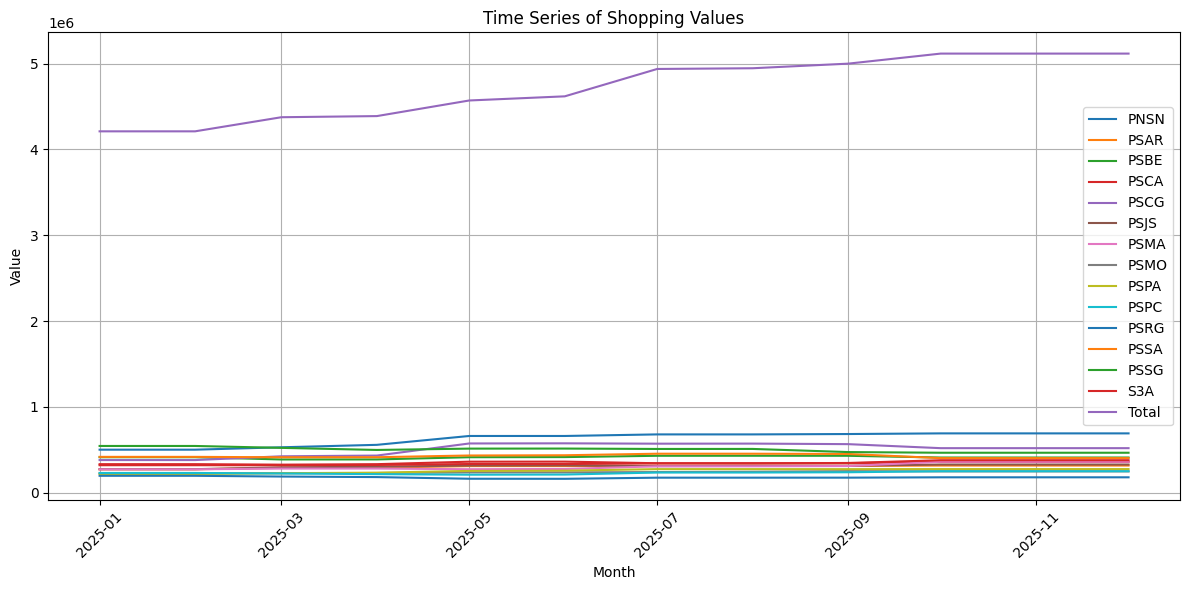

In [ ]:
# prompt: Usando o DataFrame forecast_pivot: time series

import pandas as pd
import matplotlib.pyplot as plt

# Reshape the dataframe for time series plotting
forecast_long = pd.melt(forecast_pivot, id_vars='Shopping', var_name='Month', value_name='Value')

# Convert 'Month' column to datetime objects
forecast_long['Month'] = pd.to_datetime(forecast_long['Month'], format='%m/%Y')

# Create the time series plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
for shopping_type in forecast_long['Shopping'].unique():
    subset = forecast_long[forecast_long['Shopping'] == shopping_type]
    plt.plot(subset['Month'], subset['Value'], label=shopping_type)

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Time Series of Shopping Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file with semicolon as the delimiter
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Remove unnecessary columns like totals and any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float for all relevant columns
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime format
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates

# Choose a valid shopping center ID from the unique Shopping IDs
valid_shopping_id = 'PNSN'  # Replace with any valid ID from ['PNSN', 'PSCG', 'PSMO', etc.]
shopping_data = df_melted[df_melted['Shopping'] == valid_shopping_id][['Date', 'People_Flow']]

# Ensure the filtered data is not empty
if shopping_data.empty:
    raise ValueError("No data found for the specified Shopping ID. Please select a valid ID.")

# Rename columns for Prophet model compatibility
shopping_data = shopping_data.rename(columns={'Date': 'ds', 'People_Flow': 'y'})

# Check for missing values
print("Missing values in filtered data:\n", shopping_data.isnull().sum())

# Drop rows with missing 'y' values
shopping_data.dropna(subset=['y'], inplace=True)

# Split data into training and future prediction set
train_data = shopping_data[shopping_data['ds'] < '2024-01-01']
future_data = shopping_data[shopping_data['ds'] >= '2024-01-01']

# Ensure train_data has sufficient non-null values
if len(train_data) < 2 or train_data['y'].notna().sum() < 2:
    raise ValueError("Insufficient data in train_data for Prophet model.")

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(train_data)

# Make future predictions for 2024-2025
future_dates = model.make_future_dataframe(periods=24, freq='MS')  # Monthly frequency
forecast = model.predict(future_dates)

# Filter forecasted data to match actual data for 2024 if available
matching_dates = forecast[forecast['ds'].isin(future_data['ds'])]

if not matching_dates.empty and not future_data.empty:
    y_true = future_data['y'].values
    y_pred = matching_dates['yhat'].values

    # Calculate performance metrics if we have matching dates
    if len(y_true) == len(y_pred):
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred) * 100  # Convert to percentage for interpretability

        print("Prophet Model - RMSE:", rmse)
        print("Prophet Model - MAE:", mae)
        print("Prophet Model - R-squared:", r2, "%")
    else:
        print("No matching dates between actual and predicted values for 2024.")
else:
    print("No actual 2024 data available for evaluation.")

# Display forecasted values for 2024-2025
forecast_2024_2025 = forecast[forecast['ds'].dt.year >= 2024][['ds', 'yhat']]
print(forecast_2024_2025)



INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6t_7uwdf/g1vroz5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6t_7uwdf/0sp2ecg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66936', 'data', 'file=/tmp/tmp6t_7uwdf/g1vroz5c.json', 'init=/tmp/tmp6t_7uwdf/0sp2ecg0.json', 'output', 'file=/tmp/tmp6t_7uwdf/prophet_model0orvsgbs/prophet_model-20241105130610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Missing values in filtered data:
 ds    0
y     0
dtype: int64


13:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model - RMSE: 526978.6892060157
Prophet Model - MAE: 479703.27821439673
Prophet Model - R-squared: -339.7744424245139 %
           ds          yhat
11 2024-01-01  6.247455e+05
12 2024-02-01  2.046386e+06
13 2024-03-01  6.817587e+05
14 2024-04-01 -3.070685e+05
15 2024-05-01 -3.583957e+06
16 2024-06-01  8.511366e+05
17 2024-07-01  6.977930e+05
18 2024-08-01 -5.228907e+06
19 2024-09-01  2.460086e+06
20 2024-10-01  6.697831e+05
21 2024-11-01  5.898663e+05
22 2024-12-01  4.905661e+06
23 2025-01-01  4.307468e+05
24 2025-02-01  2.149793e+06
25 2025-03-01  5.840502e+05
26 2025-04-01 -2.646636e+05
27 2025-05-01 -3.533268e+06
28 2025-06-01  6.961588e+05
29 2025-07-01  6.131684e+05
30 2025-08-01 -5.199123e+06
31 2025-09-01  2.288229e+06
32 2025-10-01  7.004891e+05
33 2025-11-01  5.450542e+05


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBRegressor

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Load the CSV file with semicolon as the delimiter
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')

# Remove unnecessary columns like totals and any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float for all relevant columns
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')

# Convert 'Date' to datetime and extract 'Year' and 'Month'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce')
df_melted = df_melted.dropna(subset=['Date'])  # Drop rows with invalid dates
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month

# Map shopping mall names to numerical labels and create a dictionary for later conversion
mall_names = df_melted['Shopping'].unique()
mall_name_to_code = {name: i for i, name in enumerate(mall_names)}
mall_code_to_name = {i: name for i, name in enumerate(mall_names)}
df_melted['Shopping'] = df_melted['Shopping'].map(mall_name_to_code)

# Prepare features and target
X = df_melted[['Year', 'Month', 'Shopping']]
y = df_melted['People_Flow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the XGBoost model
rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print("XGBoost - RMSE:", rmse_xgb, "MAE:", mae_xgb)

# Prepare data for 2025 forecast
malls = list(mall_name_to_code.values())  # Use the numerical codes for each mall
months = range(1, 13)
year = 2025

# Create forecast_data with the same columns and order as X_train
forecast_data = pd.DataFrame([(year, month, mall) for mall in malls for month in months],
                             columns=['Year', 'Month', 'Shopping'])

# Use the XGBoost model to predict the 2025 flow
forecast_data['People_Flow_2025'] = xgb_model.predict(forecast_data)

# Convert mall codes back to names for final output
forecast_data['Shopping'] = forecast_data['Shopping'].map(mall_code_to_name)

# Reshape forecast data for the final output
forecast_pivot = forecast_data.pivot(index='Shopping', columns='Month', values='People_Flow_2025')
forecast_pivot.columns = [f"{month:02d}/2025" for month in range(1, 13)]
forecast_pivot.reset_index(inplace=True)

# Display the final forecast for 2025
print(forecast_pivot)


XGBoost - RMSE: 162546.98552043008 MAE: 89552.59322916667
   Shopping       01/2025       02/2025       03/2025       04/2025  \
0      PNSN  5.138172e+05  5.138172e+05  5.337163e+05  5.337163e+05   
1      PSAR  2.586400e+05  2.586400e+05  2.973834e+05  2.973834e+05   
2      PSBE  4.150378e+05  4.150378e+05  4.038633e+05  4.038633e+05   
3      PSCA  3.384762e+05  3.384762e+05  3.451757e+05  3.451757e+05   
4      PSCG  3.903373e+05  3.903373e+05  4.346493e+05  4.346493e+05   
5      PSJS  3.040272e+05  3.040272e+05  3.113054e+05  3.113054e+05   
6      PSMA  2.705202e+05  2.705202e+05  2.726504e+05  2.726504e+05   
7      PSMO  2.346922e+05  2.346922e+05  2.304536e+05  2.304536e+05   
8      PSPA  2.289929e+05  2.289929e+05  2.349929e+05  2.349929e+05   
9      PSPC  2.296551e+05  2.296551e+05  2.225663e+05  2.225663e+05   
10     PSRG  2.118475e+05  2.118475e+05  1.850211e+05  1.850211e+05   
11     PSSA  4.226898e+05  4.226898e+05  4.175845e+05  4.175845e+05   
12     PSSG  5.8978

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SARIMA

In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pandas.tseries.offsets import MonthEnd

# Load and clean the data (assuming the data file path is accurate)
file_path = '/content/Fluxo_shoppings_final.CSV'
df = pd.read_csv(file_path, delimiter=';')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove thousands separator and convert to float
for col in df.columns[1:]:  # Skip the 'Shopping' column
    df[col] = df[col].replace({r'\.': ''}, regex=True).astype(float)

# Prepare data in long format for SARIMA
df_melted = pd.melt(df, id_vars=['Shopping'], var_name='Date', value_name='People_Flow')
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%b/%y', errors='coerce') + MonthEnd(0)
df_melted = df_melted.dropna(subset=['Date'])
df_melted = df_melted.sort_values(by=['Shopping', 'Date'])

# Set up an empty DataFrame to store the forecasted values for 2025
forecast_results = pd.DataFrame()

# Define the 2025 forecast period
forecast_periods = 12  # January to December 2025

# Loop through each mall and fit a SARIMA model
mall_names = df_melted['Shopping'].unique()

for mall in mall_names:
    # Filter data for the current mall
    mall_data = df_melted[df_melted['Shopping'] == mall].set_index('Date')
    mall_series = mall_data['People_Flow']

    # Check if there is enough data to fit a model
    if len(mall_series.dropna()) < 12:
        print(f"Skipping {mall} due to insufficient data.")
        continue

    # Resample to ensure continuity and fill missing values
    mall_series = mall_series.resample('MS').ffill().dropna()

    # Automatically select the best SARIMA model for the mall data
    try:
        sarima_model = pm.auto_arima(
            mall_series,
            seasonal=True,
            m=12,  # monthly seasonality
            trace=True,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )

        # Forecast for 2025 (12 months ahead)
        forecast = sarima_model.predict(n_periods=forecast_periods)
        forecast_dates = pd.date_range(start='2025-01-01', periods=forecast_periods, freq='MS')

        # Store forecasted values in a DataFrame
        mall_forecast_df = pd.DataFrame({
            'Shopping': mall,
            'Date': forecast_dates,
            'People_Flow_2025': forecast
        })
        forecast_results = pd.concat([forecast_results, mall_forecast_df], ignore_index=True)

    except ValueError as e:
        print(f"Could not fit SARIMA for {mall} due to error: {e}")

# Check if forecast_results has data before proceeding
if forecast_results.empty:
    print("No forecasts were generated. Check the input data and model parameters.")
else:
    # Ensure each mall has a forecast for each month in 2025
    all_dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')
    mall_complete_forecasts = []

    for mall in mall_names:
        mall_forecast = forecast_results[forecast_results['Shopping'] == mall].set_index('Date').reindex(all_dates)

        # Handle missing values by forward-filling; if no data is available, set NaN for that month
        if mall_forecast['People_Flow_2025'].isnull().all():
            print(f"No forecast available for mall {mall}. Filling with NaNs.")
        else:
            mall_forecast['People_Flow_2025'] = mall_forecast['People_Flow_2025'].fillna(method='ffill')

        mall_forecast['Shopping'] = mall  # Add back the mall identifier after reindexing
        mall_complete_forecasts.append(mall_forecast)

    # Concatenate all complete forecasts into a single DataFrame
    forecast_results_complete = pd.concat(mall_complete_forecasts).reset_index()
    forecast_results_complete.columns = ['Date', 'People_Flow_2025', 'Shopping']

    # Replace any non-numeric placeholders with NaN
    forecast_results_complete['People_Flow_2025'] = pd.to_numeric(
        forecast_results_complete['People_Flow_2025'], errors='coerce'
    )

    # Pivot the data for final output, making sure date formatting is consistent
    forecast_results_complete['Month_Year'] = forecast_results_complete['Date'].dt.strftime('%m/%Y')
    forecast_pivot = forecast_results_complete.pivot(index='Shopping', columns='Month_Year', values='People_Flow_2025')
    forecast_pivot.reset_index(inplace=True)

    # Display the final forecasted data for 2025, replacing remaining NaNs with a placeholder if necessary
    forecast_pivot = forecast_pivot.fillna("Data Unavailable")
    print(forecast_pivot)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=562.558, Time=4.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=562.855, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=552.449, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=554.684, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=561.907, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=554.149, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=554.161, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=552.983, Time=0.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=556.149, Time=0.52 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=545.507, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=551.225, Time=0.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=550.678, Time=0.12 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=549.480, Time=0.06 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=552.661, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]         

<ipython-input-41-c9c890f36b9f>:85: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mall_forecast['People_Flow_2025'] = mall_forecast['People_Flow_2025'].fillna(method='ffill')


3) SARIMA

In [ ]:
pip install statsmodels


In [ ]:
import pandas as pd

# Load the dataset without specifying parse_dates or index_col to inspect column names
data = pd.read_csv('/content/Fluxo_shoppings_final.CSV')

# Display the first few rows and column names
print(data.columns)
print(data.head())


Index(['Shopping;jan/22;jan/23;jan/24;fev/22;fev/23;fev/24;mar/22;mar/23;mar/24;abr/22;abr/23;abr/24;mai/22;mai/23;mai/24;jun/22;jun/23;jun/24;jul/22;jul/23;jul/24;ago/22;ago/23;ago/24;set/22;set/23;set/24;out/22;out/23;out/24;nov/22;nov/23;nov/24;dez/22;dez/23;dez/24;TOTAL 2022;TOTAL 2023;TOTAL 2024;'], dtype='object')
  Shopping;jan/22;jan/23;jan/24;fev/22;fev/23;fev/24;mar/22;mar/23;mar/24;abr/22;abr/23;abr/24;mai/22;mai/23;mai/24;jun/22;jun/23;jun/24;jul/22;jul/23;jul/24;ago/22;ago/23;ago/24;set/22;set/23;set/24;out/22;out/23;out/24;nov/22;nov/23;nov/24;dez/22;dez/23;dez/24;TOTAL 2022;TOTAL 2023;TOTAL 2024;
0  PNSN;480.875;606.395;68.490;471.364;537.447;20...                                                                                                                                                                                                                                                    
1  PSCG;0;435.350;397.328;336.649;381.440;329.859...                                

In [ ]:
import pandas as pd

# Load the dataset using semicolon as the delimiter
data = pd.read_csv('/content/Fluxo_shoppings_final.CSV', delimiter=';')

# Display the first few rows to check if the data is loaded correctly
print(data.head())


  Shopping   jan/22   jan/23   jan/24   fev/22   fev/23   fev/24   mar/22  \
0     PNSN  480.875  606.395   68.490  471.364  537.447  209.651  558.194   
1     PSCG        0  435.350  397.328  336.649  381.440  329.859  379.855   
2     PSMO  188.200  216.108  219.088  157.751  185.736  201.501  183.037   
3     PSAR        0        0  265.605        0    4.685  255.805        0   
4     PSCA  304.810  335.740  343.795  292.453  303.485  310.910  311.009   

    mar/23   mar/24   abr/22   abr/23   abr/24   mai/22   mai/23   mai/24  \
0  588.145  272.516  579.012  623.962  229.463  679.093  606.531   81.012   
1  374.776  426.203  406.163  432.687  445.161  419.916  440.115  487.986   
2  189.352  234.845  191.513  224.402  210.260  201.454  221.653  235.314   
3  221.559  307.414        0  254.042  273.475        0  270.986  308.355   
4  319.183  347.834  338.620  355.338  318.872  346.390  357.967  343.750   

    jun/22   jun/23   jun/24   jul/22   jul/23   jul/24   ago/22   ago/23 

In [ ]:
import pandas as pd

# Load the dataset with correct delimiter
data = pd.read_csv('/content/Fluxo_shoppings_final.CSV', delimiter=';')

# Reshape the data by converting month columns into rows
data_long = pd.melt(
    data,
    id_vars=['Shopping'],
    value_vars=[col for col in data.columns if '/' in col],
    var_name='Month_Year',
    value_name='People_Flow'
)

# Remove thousand separators (dots) and convert People_Flow to float
data_long['People_Flow'] = data_long['People_Flow'].replace({r'\.': ''}, regex=True).astype(float)

# Parse Month_Year to datetime, assuming it's in the format 'MMM/YY'
data_long['Date'] = pd.to_datetime(data_long['Month_Year'], format='%b/%y', errors='coerce')

# Drop rows where Date could not be parsed
data_long = data_long.dropna(subset=['Date'])

# Set Date as index for time series analysis and drop Month_Year (no longer needed)
data_long = data_long.set_index('Date').drop(columns=['Month_Year'])

# Sort the data by Shopping and Date to make it sequential
data_long = data_long.sort_values(by=['Shopping', 'Date'])

# Check the final data structure
print(data_long.head())


           Shopping  People_Flow
Date                            
2022-01-01     PNSN     480875.0
2022-03-01     PNSN     558194.0
2022-06-01     PNSN     636185.0
2022-07-01     PNSN     638657.0
2022-11-01     PNSN     655296.0
